In [1]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

table_path = "../data/3_sigma_process.xlsx"
reduce_table_path = "../data/data_num_325_reduce.xlsx"
temp_table_path = "../data/data_num_325_noPCA.xlsx"
#Data loading
data = pd.read_excel(table_path,index_col=0)
#data = data.drop("样本编号", 1)
#data = data.drop("时间", 1)
y = data["Product_RON_loss"]
X = data.drop("Product_RON_loss",1)
X = X.drop("Product_RON",1)
X.head()

,Raw_S_content,Raw_RON,Raw_Saturated_hydrocarbon,Raw_Olefins,Raw_Aromatics,Raw_Bromine_value,Raw_Density,Product_S_content,Spent_C,Spent_S,...,S-ZORB.CAL_1.CANGLIANG.PV,S-ZORB.FT_1006.DACA.PV,S-ZORB.FT_5204.DACA.PV,S-ZORB.FT_1006.TOTALIZERA.PV,S-ZORB.FT_5204.TOTALIZERA.PV,S-ZORB.FT_1503.DACA.PV,S-ZORB.FT_1503.TOTALIZERA.PV,S-ZORB.FT_1504.DACA.PV,S-ZORB.FT_1504.TOTALIZERA.PV,S-ZORB.PC_1001A.PV
0,188.0,90.6,53.230000,24.400000,22.370000,61.487143,726.085714,3.2,2.32,7.30,...,2.045436,6368.74700,233.310805,83086802.0,832503.795,2216.40935,39063124.5,1840.14470,39608757.0,0.353271
1,169.0,90.5,52.300000,26.400000,21.300000,61.880000,731.300000,3.2,2.37,7.34,...,2.025974,6360.64530,242.369205,82318954.0,803462.665,2370.58740,38810581.5,1641.73260,39389299.0,0.354504
2,177.0,90.7,52.300000,26.314286,21.385714,61.722857,729.614286,3.2,2.43,7.27,...,1.964696,6504.96490,233.076925,82012004.0,791925.055,2326.46535,38693812.0,1600.67575,39312616.5,0.350181
3,159.0,90.4,52.300000,26.100000,21.600000,61.330000,725.400000,3.2,3.08,7.35,...,2.039041,6506.82495,238.349935,81231373.5,762863.810,2495.22360,38410862.5,1563.71215,39120204.5,0.353930
4,173.0,89.6,52.242857,26.671429,21.085714,61.332857,725.428571,3.2,2.45,6.58,...,1.986900,6560.24225,236.576220,80915707.5,751362.300,2807.78910,38283000.0,1554.35740,39045953.5,0.358053


In [2]:
# Count the number of rows in total
print(X.shape)

(325, 366)


In [3]:
# Count the column types
X.dtypes.value_counts()

float64    364
int64        2
dtype: int64

In [4]:
nans = pd.isnull(X).sum()
nans[nans>0]

Series([], dtype: int64)

In [5]:
X.describe()

,Raw_S_content,Raw_RON,Raw_Saturated_hydrocarbon,Raw_Olefins,Raw_Aromatics,Raw_Bromine_value,Raw_Density,Product_S_content,Spent_C,Spent_S,...,S-ZORB.CAL_1.CANGLIANG.PV,S-ZORB.FT_1006.DACA.PV,S-ZORB.FT_5204.DACA.PV,S-ZORB.FT_1006.TOTALIZERA.PV,S-ZORB.FT_5204.TOTALIZERA.PV,S-ZORB.FT_1503.DACA.PV,S-ZORB.FT_1503.TOTALIZERA.PV,S-ZORB.FT_1504.DACA.PV,S-ZORB.FT_1504.TOTALIZERA.PV,S-ZORB.PC_1001A.PV
count,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,...,325.000000,325.000000,325.000000,3.250000e+02,3.250000e+02,325.000000,3.250000e+02,325.000000,3.250000e+02,325.000000
mean,229.548904,89.733538,52.676228,25.389298,21.949782,54.526661,726.755265,3.800615,2.913287,8.063265,...,2.209628,4843.993930,138.497321,6.719406e+07,1.113469e+06,2190.862732,1.521126e+07,2409.550662,1.760142e+07,-33.277532
std,65.752227,0.889764,4.584314,4.954857,1.823616,6.818416,4.262181,1.088180,1.534346,2.132002,...,0.143849,2359.134691,128.581578,3.861360e+07,1.169934e+06,418.047777,1.060279e+07,452.316109,1.172462e+07,42.008897
min,57.000000,87.200000,43.240000,14.600000,16.822222,36.520000,715.100000,3.200000,1.010000,2.940000,...,1.879160,0.000000,0.000000,0.000000e+00,3.050138e+04,979.564940,0.000000e+00,1222.663100,0.000000e+00,-120.560473
25%,185.000000,89.200000,49.610000,21.800000,20.690000,48.750000,724.200000,3.200000,1.850000,6.990000,...,2.087072,4215.424100,0.000000,3.272797e+07,3.518756e+04,1887.742875,6.520788e+06,2329.794550,7.974892e+06,-72.834572
50%,240.285714,89.800000,53.250000,24.800000,21.890000,53.980000,726.300000,3.200000,2.390000,8.400000,...,2.247015,5094.966775,142.936557,7.252226e+07,3.631831e+05,2177.557700,1.381849e+07,2538.538450,1.643785e+07,0.293821
75%,271.428571,90.300000,56.100000,29.000000,23.300000,60.190000,729.500000,4.100000,3.450000,9.370000,...,2.310493,6129.741900,195.923272,1.017919e+08,2.545050e+06,2496.749950,2.254427e+07,2702.628700,2.678945e+07,0.350086
max,392.000000,91.700000,63.400000,34.670000,26.200000,70.500000,738.700000,7.700000,7.810000,14.310000,...,2.664986,11320.456750,552.153825,1.236097e+08,2.562289e+06,3334.904725,3.906312e+07,3104.564825,3.960876e+07,0.358053


In [6]:
#Feature select - Way 1: Variance Threshold

#Remove features with low variance
from sklearn.feature_selection import VarianceThreshold
all_name = X.columns.values.tolist()
#方差选择法，返回值为特征选择后的数据
#参数threshold为方差的阈值,删除低于方差的特征
selector = VarianceThreshold(threshold = 0.05)
X_array = selector.fit_transform(X)
print(X_array.shape)
select_name_index0 = selector.get_support(indices=True)
select_name0 = []
for i in select_name_index0:
    select_name0.append(all_name[i])
X = pd.DataFrame(X_array, columns = select_name0)
X.head()

(325, 291)


,Raw_S_content,Raw_RON,Raw_Saturated_hydrocarbon,Raw_Olefins,Raw_Aromatics,Raw_Bromine_value,Raw_Density,Product_S_content,Spent_C,Spent_S,...,S-ZORB.CAL.LEVEL.PV,S-ZORB.FT_1006.DACA.PV,S-ZORB.FT_5204.DACA.PV,S-ZORB.FT_1006.TOTALIZERA.PV,S-ZORB.FT_5204.TOTALIZERA.PV,S-ZORB.FT_1503.DACA.PV,S-ZORB.FT_1503.TOTALIZERA.PV,S-ZORB.FT_1504.DACA.PV,S-ZORB.FT_1504.TOTALIZERA.PV,S-ZORB.PC_1001A.PV
0,188.0,90.6,53.230000,24.400000,22.370000,61.487143,726.085714,3.2,2.32,7.30,...,76.849853,6368.74700,233.310805,83086802.0,832503.795,2216.40935,39063124.5,1840.14470,39608757.0,0.353271
1,169.0,90.5,52.300000,26.400000,21.300000,61.880000,731.300000,3.2,2.37,7.34,...,76.184425,6360.64530,242.369205,82318954.0,803462.665,2370.58740,38810581.5,1641.73260,39389299.0,0.354504
2,177.0,90.7,52.300000,26.314286,21.385714,61.722857,729.614286,3.2,2.43,7.27,...,75.966841,6504.96490,233.076925,82012004.0,791925.055,2326.46535,38693812.0,1600.67575,39312616.5,0.350181
3,159.0,90.4,52.300000,26.100000,21.600000,61.330000,725.400000,3.2,3.08,7.35,...,76.790042,6506.82495,238.349935,81231373.5,762863.810,2495.22360,38410862.5,1563.71215,39120204.5,0.353930
4,173.0,89.6,52.242857,26.671429,21.085714,61.332857,725.428571,3.2,2.45,6.58,...,76.539556,6560.24225,236.576220,80915707.5,751362.300,2807.78910,38283000.0,1554.35740,39045953.5,0.358053


In [7]:
#Feature Scaling - Mean to 0, variance to 1
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)
print(X.shape)

(325, 291)


In [8]:
#Feature Normalizing - Value to 0~1
#from sklearn.preprocessing import Normalizer

#归一化，返回值为归一化后的数据
#X = pd.DataFrame(Normalizer().fit_transform(X), columns = X.columns)
#print(X.shape)

In [9]:
#Feature select - Way 2: corr
# Delete high corr features

# Threshold for removing correlated variables
threshold = 0.9

# Absolute value correlation matrix
corr_matrix = X.corr().abs()
# Upper triangle of correlations
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
# Select columns with correlations above threshold
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
#print('There are %d columns to remove.' % (len(to_drop)))
X = X.drop(columns = to_drop)
X.shape

(325, 163)

<AxesSubplot:>

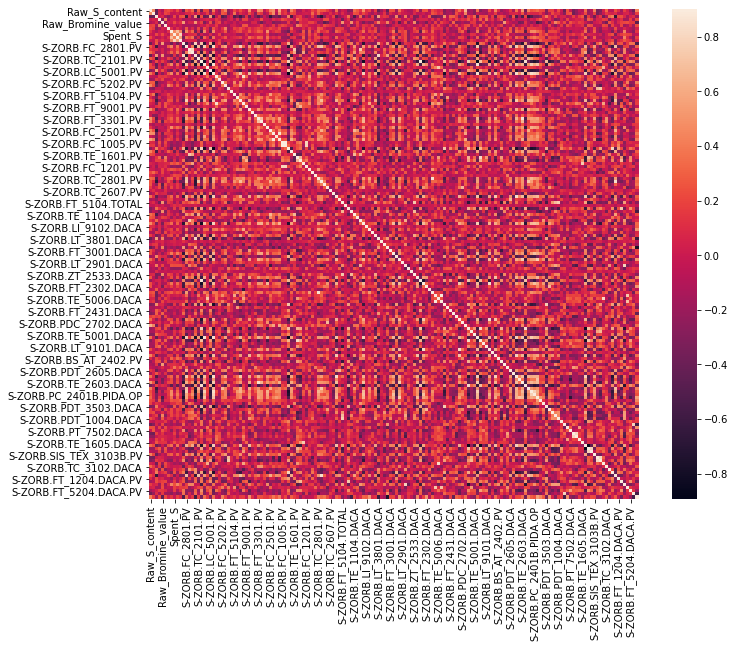

In [10]:
#Correlation map to see how features are correlated with SalePrice
corrmat = X.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)

In [11]:
X_noPCA = X.copy()
X_noPCA["Product_RON_loss"] = y
X_noPCA.head()
X_noPCA.to_excel(temp_table_path)
print("save reduced features to", temp_table_path)

save reduced features to ../data/data_num_325_noPCA.xlsx


In [12]:
from sklearn.decomposition import PCA
pca = PCA()
X_pca = pca.fit_transform(X)         # 得到的PCA结果，第1列(不是第一个list）是PC1...第N列是PCN。 
print(X_pca)

[[-7.84814661e+00  8.87417233e-01 -5.85324518e+00 ... -5.25083982e-02
  -3.26727712e-02  3.51109814e-02]
 [-7.30081995e+00  3.38154332e-01 -6.23808990e+00 ...  7.07684276e-02
   1.07506872e-02 -2.03533279e-02]
 [-6.80635553e+00  1.68416996e+00 -5.96534338e+00 ... -6.31875787e-03
   4.97361091e-02 -7.73599307e-04]
 ...
 [ 5.22870734e+00 -4.64757856e+00 -6.44368438e-01 ... -8.41906929e-03
  -3.05043303e-02  3.20155542e-02]
 [ 5.29307458e+00 -4.13093449e+00 -7.18902871e-01 ...  2.48589959e-03
   4.47004552e-02  1.57631370e-02]
 [ 5.32342794e+00 -6.73656882e+00 -2.91266848e+00 ... -6.30879082e-02
  -9.87930373e-03 -1.43817781e-02]]


In [13]:
# 特征向量/PC
X_cov = pca.get_covariance() 
print(X_cov)
print(X_cov.shape)


[[ 1.00308642  0.47610222 -0.44080085 ... -0.17407768 -0.37168226
   0.43164993]
 [ 0.47610222  1.00308642 -0.42497573 ... -0.06183831 -0.21676287
   0.17700446]
 [-0.44080085 -0.42497573  1.00308642 ...  0.05315635  0.10606231
  -0.17866152]
 ...
 [-0.17407768 -0.06183831  0.05315635 ...  1.00308642  0.13966164
  -0.20046854]
 [-0.37168226 -0.21676287  0.10606231 ...  0.13966164  1.00308642
  -0.57210086]
 [ 0.43164993  0.17700446 -0.17866152 ... -0.20046854 -0.57210086
   1.00308642]]
(163, 163)


In [14]:
# 各个主成分的贡献率
exp_var_ratio = pca.explained_variance_ratio_         # 特征根由`pca.explained_variance_` 得到。
print( exp_var_ratio)
print(len(exp_var_ratio))
print(pd.DataFrame(pca.components_,columns=X.columns))

[2.29560863e-01 1.00836099e-01 7.07865929e-02 5.73113935e-02
 4.71898946e-02 3.43714171e-02 3.23956112e-02 2.71473309e-02
 2.56247494e-02 2.18549929e-02 1.76667494e-02 1.62177981e-02
 1.51362955e-02 1.45021447e-02 1.34131308e-02 1.20292388e-02
 1.08648499e-02 9.33028405e-03 8.97006709e-03 8.77332106e-03
 8.41534390e-03 8.14501667e-03 7.98806135e-03 7.34795489e-03
 7.33373035e-03 6.59761131e-03 6.46212089e-03 6.18086589e-03
 5.98667743e-03 5.89611252e-03 5.50229742e-03 5.31482149e-03
 5.00266238e-03 4.95769953e-03 4.79038915e-03 4.61098450e-03
 4.46618980e-03 4.24614571e-03 4.06378931e-03 3.89771474e-03
 3.78942531e-03 3.72036395e-03 3.62100244e-03 3.30592469e-03
 3.28228008e-03 3.21271465e-03 3.00314552e-03 2.91497399e-03
 2.86210079e-03 2.75173793e-03 2.61595974e-03 2.49645366e-03
 2.40072517e-03 2.29335665e-03 2.23717308e-03 2.19218890e-03
 2.05680937e-03 2.00950084e-03 1.89106628e-03 1.87183445e-03
 1.84962488e-03 1.80521222e-03 1.70229434e-03 1.62310779e-03
 1.58616153e-03 1.548856

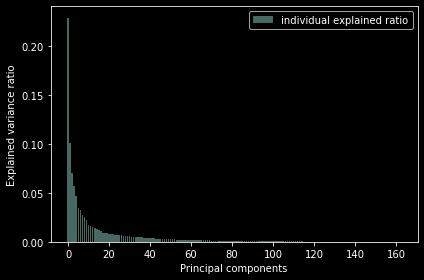

In [15]:
with plt.style.context('dark_background'):
    plt.figure(figsize=(6, 4))
    plt.bar(range(len(exp_var_ratio)), exp_var_ratio, alpha=0.5, label='individual explained ratio')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()

Text(0, 0.5, 'cumulative explained variance')

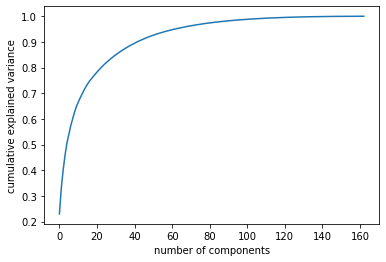

In [16]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
# We need 30 components to get 90% variance!

In [17]:
pca = PCA(n_components=30,whiten=True)
pca = pca.fit(X)
XPCA = pd.DataFrame(pca.transform(X))
XPCA.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,-1.281018,0.218553,-1.720514,0.867571,-0.153856,0.018643,-1.008571,-1.880630,1.365240,-0.951186,...,-1.093848,0.282418,-0.948161,0.473711,-0.077370,-0.559532,0.273110,0.443778,0.458671,-0.237886
1,-1.191680,0.083281,-1.833636,0.998477,-0.410934,0.434378,-1.584774,-1.372637,0.867174,-1.442064,...,-0.257120,0.232324,-0.143356,0.553723,-0.497214,0.421631,1.508771,0.174567,0.752121,-1.471532
2,-1.110971,0.414777,-1.753464,0.462669,-0.318112,-0.033584,-1.442646,-1.807762,0.268393,-0.529419,...,-0.698237,0.866621,0.628230,0.170068,0.429665,-0.340125,0.235624,-1.174455,-0.190068,-0.449239
3,-1.046164,0.455359,-1.727485,0.490777,-0.270328,-0.010238,-1.628983,-1.619778,0.353826,-0.419763,...,-0.801899,0.717826,0.747057,-0.212439,-0.568275,0.405401,0.801241,-0.209465,-0.558158,0.013984
4,-1.072234,0.388213,-1.680629,0.132179,0.261363,0.093363,-1.042338,-1.964336,0.755776,0.575388,...,-0.263311,-0.219098,0.102339,1.118633,0.558476,0.053035,0.267638,-1.000021,0.132342,0.364713


In [18]:
X_cov = pca.get_covariance()
print(X_cov)

[[ 11.52524821   6.31174997 -10.49693122 ...  -8.40472923  -7.97218352
    9.70426902]
 [  6.31174997   5.58733817  -5.67351738 ...  -3.51138285  -3.97825925
    4.56550062]
 [-10.49693122  -5.67351738  16.05824692 ...   7.54847492   6.98538096
   -9.00205329]
 ...
 [ -8.40472923  -3.51138285   7.54847492 ...  13.41870172   6.04675683
   -7.03401663]
 [ -7.97218352  -3.97825925   6.98538096 ...   6.04675683   8.56941039
   -8.47138388]
 [  9.70426902   4.56550062  -9.00205329 ...  -7.03401663  -8.47138388
   12.81431942]]


[0.22956086 0.1008361  0.07078659 0.05731139 0.04718989 0.03437142
 0.03239561 0.02714733 0.02562475 0.02185499 0.01766675 0.0162178
 0.0151363  0.01450214 0.01341313 0.01202924 0.01086485 0.00933028
 0.00897007 0.00877332 0.00841534 0.00814502 0.00798806 0.00734795
 0.00733373 0.00659761 0.00646212 0.00618087 0.00598668 0.00589611]


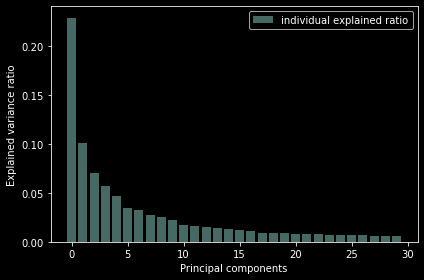

In [19]:
# 各个主成分的贡献率
exp_var_ratio = pca.explained_variance_ratio_         # 特征根由`pca.explained_variance_` 得到。

print( exp_var_ratio)                                 # = 特征根/(∑特征根)，由大到小排列


import matplotlib.pyplot as plt    # 把PC贡献率可视化
%matplotlib inline
with plt.style.context('dark_background'):
    plt.figure(figsize=(6, 4))
    plt.bar(range(len(exp_var_ratio)), exp_var_ratio, alpha=0.5, label='individual explained ratio')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()

In [20]:
XPCA["Product_RON_loss"] = y
XPCA.head()

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,Product_RON_loss
0,-1.281018,0.218553,-1.720514,0.867571,-0.153856,0.018643,-1.008571,-1.880630,1.365240,-0.951186,...,0.282418,-0.948161,0.473711,-0.077370,-0.559532,0.273110,0.443778,0.458671,-0.237886,1.38
1,-1.191680,0.083281,-1.833636,0.998477,-0.410934,0.434378,-1.584774,-1.372637,0.867174,-1.442064,...,0.232324,-0.143356,0.553723,-0.497214,0.421631,1.508771,0.174567,0.752121,-1.471532,1.18
2,-1.110971,0.414777,-1.753464,0.462669,-0.318112,-0.033584,-1.442646,-1.807762,0.268393,-0.529419,...,0.866621,0.628230,0.170068,0.429665,-0.340125,0.235624,-1.174455,-0.190068,-0.449239,1.38
3,-1.046164,0.455359,-1.727485,0.490777,-0.270328,-0.010238,-1.628983,-1.619778,0.353826,-0.419763,...,0.717826,0.747057,-0.212439,-0.568275,0.405401,0.801241,-0.209465,-0.558158,0.013984,1.38
4,-1.072234,0.388213,-1.680629,0.132179,0.261363,0.093363,-1.042338,-1.964336,0.755776,0.575388,...,-0.219098,0.102339,1.118633,0.558476,0.053035,0.267638,-1.000021,0.132342,0.364713,1.28


In [21]:
XPCA.to_excel(reduce_table_path)
print("save reduced features to", reduce_table_path)

save reduced features to ../data/data_num_325_reduce.xlsx
